In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow_datasets as tfds

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [5]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [6]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = load_dataset(62000,62000)

X_train: (62000, 784)
y_train: (62000, 10)
X_test: (62000, 784)
y_test: (62000, 10)
Min: -1.2783020350223417
Max: 248.99598390374152


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Optimizing at the initialization stage

In [10]:
from tensorflow.keras import layers

In [11]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape = (784,), kernel_initializer = initializer),
                                layers.Dense(32, activation, input_shape = (784,), kernel_initializer = initializer),
                                layers.Dense(32, activation, input_shape = (784,), kernel_initializer = initializer),
                                layers.Dense(32, activation, input_shape = (784,), kernel_initializer = initializer),
                                layers.Dense(10, activation = 'softmax', input_shape = (784,), kernel_initializer = initializer)

    ])

In [12]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


20/20 [==============================] - 1s 16ms/step - loss: 2.3028 - accuracy: 0.1085 - val_loss: 2.3027 - val_accuracy: 0.1208
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3027 - accuracy: 0.1170 - val_loss: 2.3027 - val_accuracy: 0.1158
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1124 - val_loss: 2.3026 - val_accuracy: 0.1145
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.1115 - val_loss: 2.3025 - val_accuracy: 0.1143
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3025 - accuracy: 0.1113 - val_loss: 2.3024 - val_accuracy: 0.1143
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1112 - val_loss: 2.3023 - val_accuracy: 0.1143
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1112 - val_loss: 2.3023 - val_accuracy: 0.1143
Epoch 8/10
20/20 [============

In [13]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 2.3026 - accuracy: 0.1095 - val_loss: 2.3025 - val_accuracy: 0.1142
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3025 - accuracy: 0.1110 - val_loss: 2.3025 - val_accuracy: 0.1142
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3025 - accuracy: 0.1110 - val_loss: 2.3024 - val_accuracy: 0.1142
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1110 - val_loss: 2.3023 - val_accuracy: 0.1142
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1110 - val_loss: 2.3023 - val_accuracy: 0.1142
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3023 - accuracy: 0.1110 - val_loss: 2.3022 - val_accuracy: 0.1142
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 2.3023 - accuracy: 0.1110 - val_loss: 2.3022 - val_accuracy: 0.1142
Epoch 8/10
20/20 [=

In [14]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


20/20 [==============================] - 1s 14ms/step - loss: 2.3075 - accuracy: 0.0905 - val_loss: 2.2808 - val_accuracy: 0.1240
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.2480 - accuracy: 0.1601 - val_loss: 2.2270 - val_accuracy: 0.2083
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 2.1960 - accuracy: 0.2408 - val_loss: 2.1769 - val_accuracy: 0.2823
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 2.1459 - accuracy: 0.3040 - val_loss: 2.1269 - val_accuracy: 0.3344
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 2.0956 - accuracy: 0.3445 - val_loss: 2.0755 - val_accuracy: 0.3751
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 2.0435 - accuracy: 0.3787 - val_loss: 2.0213 - val_accuracy: 0.4070
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 1.9877 - accuracy: 0.4043 - val_loss: 1.9623 - val_accuracy: 0.4317
Epoch 8/10
20/20 [============

In [15]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


20/20 [==============================] - 1s 14ms/step - loss: 2.5643 - accuracy: 0.1782 - val_loss: 2.2537 - val_accuracy: 0.2594
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.0873 - accuracy: 0.3068 - val_loss: 1.9399 - val_accuracy: 0.3663
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 1.8278 - accuracy: 0.4014 - val_loss: 1.7198 - val_accuracy: 0.4544
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 1.6343 - accuracy: 0.4781 - val_loss: 1.5487 - val_accuracy: 0.5270
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 1.4813 - accuracy: 0.5399 - val_loss: 1.4138 - val_accuracy: 0.5787
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 1.3573 - accuracy: 0.5891 - val_loss: 1.3023 - val_accuracy: 0.6171
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 1.2520 - accuracy: 0.6306 - val_loss: 1.2040 - val_accuracy: 0.6501
Epoch 8/10
20/20 [============

Text(0, 0.5, 'Validation Accuracy')

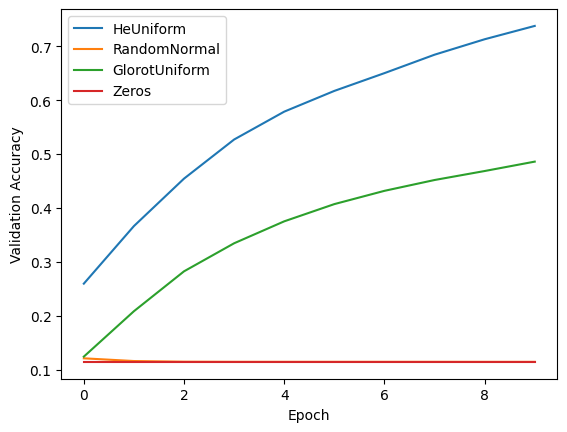

In [18]:
import matplotlib.pyplot as plt
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')


In [25]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])
simple_model_bn().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [27]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init,activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model_bn.fit(X_train,y_train,epochs = 10, batch_size = 3200, validation_data = (X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 22ms/step - loss: 1.9763 - accuracy: 0.3519 - val_loss: 2.2964 - val_accuracy: 0.1303
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 1.2654 - accuracy: 0.6079 - val_loss: 2.2860 - val_accuracy: 0.1347
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.9881 - accuracy: 0.7072 - val_loss: 2.2691 - val_accuracy: 0.1659
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.8277 - accuracy: 0.7594 - val_loss: 2.2442 - val_accuracy: 0.2109
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.7232 - accuracy: 0.7922 - val_loss: 2.2099 - val_accuracy: 0.2522
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6492 - accuracy: 0.8145 - val_loss: 2.1637 - val_accuracy: 0.2875
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5945 - accuracy: 0.8323 - val_loss: 2.1039 - val_accuracy: 0.3522
Epoch 8/10
20/20

In [28]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(0.01)
model_bn_ad = simple_model_bn(init,activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model_bn_ad.fit(X_train,y_train,epochs = 10, batch_size = 3200, validation_data = (X_test, y_test))

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 25ms/step - loss: 1.1700 - accuracy: 0.6413 - val_loss: 2.2974 - val_accuracy: 0.1857
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.5039 - accuracy: 0.8667 - val_loss: 2.2924 - val_accuracy: 0.1674
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.3799 - accuracy: 0.9005 - val_loss: 2.2858 - val_accuracy: 0.1229
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.3158 - accuracy: 0.9169 - val_loss: 2.2774 - val_accuracy: 0.1471
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2742 - accuracy: 0.9278 - val_loss: 2.2650 - val_accuracy: 0.1598
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2445 - accuracy: 0.9360 - val_loss: 2.2478 - val_accuracy: 0.2247
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2217 - accuracy: 0.9417 - val_loss: 2.2243 - val_accuracy: 0.2787
Epoch 8/10
20/20 [=

In [29]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(0.01)
model_bn_adam = simple_model_bn(init,activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model_bn_adam.fit(X_train,y_train,epochs = 10, batch_size = 3200, validation_data = (X_test, y_test))

/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 22ms/step - loss: 0.9336 - accuracy: 0.7151 - val_loss: 2.1534 - val_accuracy: 0.3369
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.2622 - accuracy: 0.9244 - val_loss: 1.8875 - val_accuracy: 0.5165
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1672 - accuracy: 0.9512 - val_loss: 1.6840 - val_accuracy: 0.6172
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.1252 - accuracy: 0.9638 - val_loss: 1.4992 - val_accuracy: 0.7426
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0987 - accuracy: 0.9708 - val_loss: 1.2963 - val_accuracy: 0.7881
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0795 - accuracy: 0.9771 - val_loss: 1.0746 - val_accuracy: 0.8575
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0659 - accuracy: 0.9810 - val_loss: 0.8723 - val_accuracy: 0.8821
Epoch 8/10
20/2

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(0.01)
model_bn_adam = simple_model_bn(init,activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, restore_best_weights=True, verbose = 1)

histroy = model_bn_adam.fit(X_train,y_train,epochs = 10, batch_size = 3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose = 0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose = 0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)



/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 2s 23ms/step - loss: 0.9343 - accuracy: 0.7138 - val_loss: 2.0771 - val_accuracy: 0.2620
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.2676 - accuracy: 0.9224 - val_loss: 1.8166 - val_accuracy: 0.4778
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1764 - accuracy: 0.9479 - val_loss: 1.6330 - val_accuracy: 0.5627
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1340 - accuracy: 0.9608 - val_loss: 1.4941 - val_accuracy: 0.6488
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 1.2593 - val_accuracy: 0.7898
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0899 - accuracy: 0.9735 - val_loss: 1.0147 - val_accuracy: 0.8885
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0742 - accuracy: 0.9785 - val_loss: 0.7596 - val_accuracy: 0.9042
Epoch 8/10
20/20 

In [32]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(0.01)
model_bn_adam = simple_model_bn(init,activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, restore_best_weights=True, verbose = 1)

histroy = model_bn_adam.fit(X_train,y_train,epochs = 2000, callbacks = [es], validation_data = (X_test, y_test), verbose = 0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose = 0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose = 0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)



/Users/houhiroshisakai/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping
Train Acc: 0.9884032011032104 Test Acc: 0.9614677429199219
